# What makes the Traffic on I-94 Interstate highway worse?

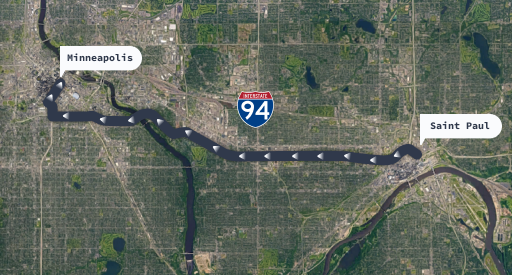

<b><font size="4">Introduction:</font> </b>

In this project, we will aim to find the good indicators that makes the about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94) heavier.
We will analyzing dataset published by John Hogue from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). To find those factors, we will try to find out:

- What is the months have the heaviest traffic?
- Is traffic volume impacted by daytime and nighttime?
- Is different in volume in business days and weekend?
- Which hour the volume traffic is highest in a day?
- Which type of weather makes traffic worse?


<b> <font size="4"> Attribute Information </font> </b>:

- holiday: US National holidays plus regional holiday, Minnesota State Fair

- temp:Average temp in kelvin

- rain_1h: Amount in mm of rain that occurred in the hour

- snow_1h: Amount in mm of snow that occurred in the hour

- clouds_all: Percentage of cloud cover

- weather_main: Short textual description of the current weather

- weather_description: Longer textual description of the current weather

- date_time: Hour of the data collected in local CST time

- traffic_volume: Hourly I-94 ATR 301 reported westbound traffic volume


<b><font size="4">Summary of results:</font>  </b>:

After analyzing the dataset, we found that there are couple good indicators of heavy traffic on I-94: time and weather. The traffic is heavier in daytime, especially around 7AM and 4PM at the working days in the warm months of the year. When it is shower snow, or light rain and snow or proximity thunderstorm with drizzle, the traffic volume is higher too.

For more details, please refer to the the full analysis below.


In [1]:
#Import libraries:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style 
style.use('fivethirtyeight')

#Read file:
traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
#Take overview of dataset to check if there is missing data or wrong format
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There is no missing data but the column of date_time is wrong format that must be modified

In [3]:
#Correct the format of column date_time
import datetime as dt
traffic["date_time"] = pd.to_datetime(traffic["date_time"])
traffic["date_time"]

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

# Analyzing traffic volume

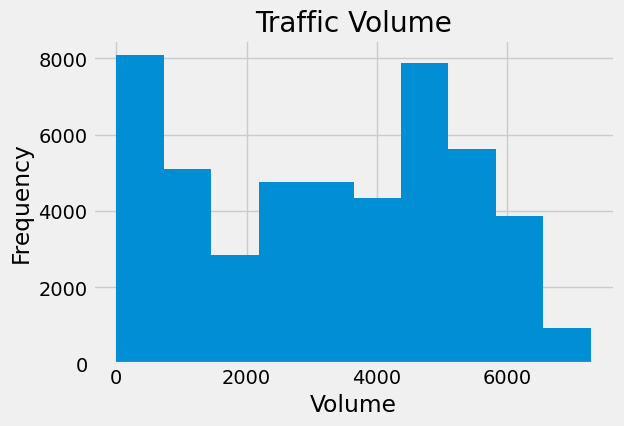

In [4]:
traffic["traffic_volume"].plot.hist()
plt.title ("Traffic Volume")
plt.xlabel ("Volume")
plt.show()

In [5]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The mean of volume is likely the median but the graph shows there is 2 peak of volume: around 0-700 (this could be at night) and 4500-5000 (this could be at daylight).

Daytime and nightime can influence the traffic volume. Let's explore next by dividing dataset into 2 parts:

- Daytime data: hours from 7AM to 7PM
- Nighttime data: hours from 7PM to 7AM next day

<b><font size="4">Traffic Volume: Day vs. Night:</font> </b>

In [6]:
#Create daytime dataset:
daytime=traffic[(traffic["date_time"].dt.hour>=7) & (traffic["date_time"].dt.hour<=19)]
daytime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [7]:
#Create night time dataset:
nighttime=traffic[(traffic["date_time"].dt.hour<7) | (traffic["date_time"].dt.hour>19)]
nighttime

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
...,...,...,...,...,...,...,...,...,...
48184,None,280.17,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 06:00:00,802
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


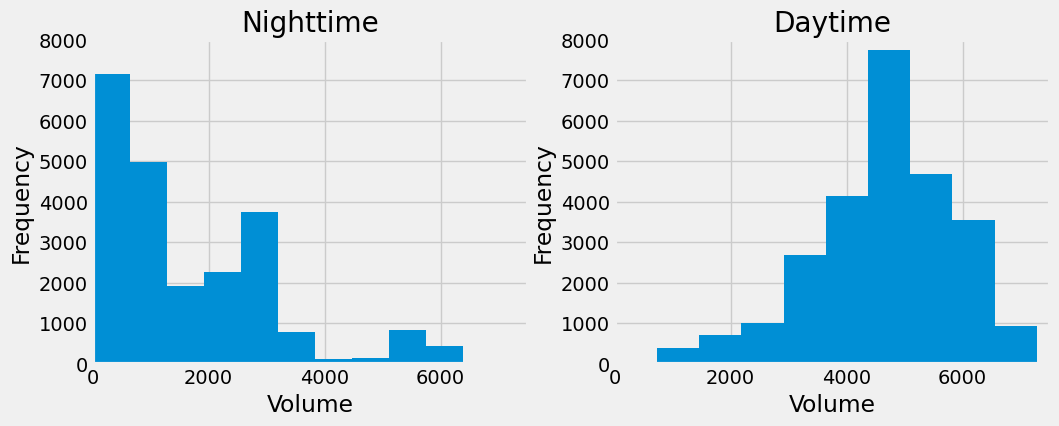

In [8]:
#Visualize and compare data daytime and nightime:

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
nighttime["traffic_volume"].plot.hist()
plt.title("Nighttime")
plt.xlabel("Volume")
plt.xlim([0,7500])
plt.ylim([0,8000])


plt.subplot(1,2,2)
daytime["traffic_volume"].plot.hist()
plt.title("Daytime")
plt.xlabel("Volume")
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.show()


In [9]:
daytime["traffic_volume"].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
nighttime["traffic_volume"].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

From above graphs and information of volume for both day and night, we have see some indicator:

- In general, the volume of traffic at night less than in the day light.
- The distribution of volume in day time is likely normal, that means most of volume is around its mean
- The distribution of volume in night time left skewed and most of them are less than 3000. This is not a good indicator of heavy traffic, we should not using the nighttime data as our goal is to find indicators of heavy traffic.

So we should only focus on the daytime data from now on.

#  Time indicator

Let's start discover the indicators that impact traffic volume and the first thing we can consider is time.
- Is volume changed by month? We can answer this by look into info volume traffic by month
- Is volume changed in working days and weekend? We will dig deeper in this too
- Is volume changed by hours? We will check this also.

<b> <font size = "4"> 1. Volume traffic by month </font> </b>

In [11]:
#Create new column called "month" by extracting month from date_time data
daytime["month"]=daytime["date_time"].dt.month.copy()
volume_by_month=daytime.groupby(["month"])["traffic_volume"].mean()
volume_by_month


<ipython-input-11-5617dcd9bce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["month"]=daytime["date_time"].dt.month.copy()


month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Volume')

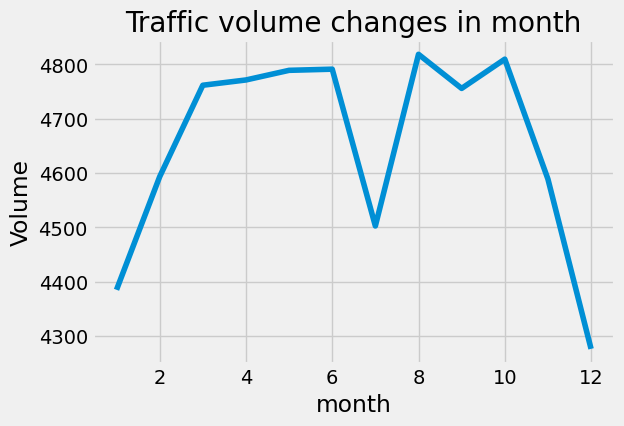

In [12]:
#Visualize data by month
volume_by_month.plot.line()
plt.title("Traffic volume changes in month")
plt.ylabel("Volume")

The traffic volume is high from March to October (except July) when the weather is warm and it's lighter in November to Feburary when the weather is cold. 

<b> <font size = "4"> 2. Volume traffic by day of the week </font> </b>

In [13]:
#Create new column "day_of week" by extracting data day from date_time column:

daytime["day_of_week"]=daytime["date_time"].dt.dayofweek.copy()
daytime["day_of_week"].unique() #0 means Monday, 6 means Sunday

<ipython-input-13-ec3040c628dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["day_of_week"]=daytime["date_time"].dt.dayofweek.copy()


array([1, 2, 3, 4, 5, 6, 0])

In [28]:
#Calculate mean of traffic volume by day of week
volume_by_day_of_week=daytime.groupby(["day_of_week"])["traffic_volume"].mean()
volume_by_day_of_week

day_of_week
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

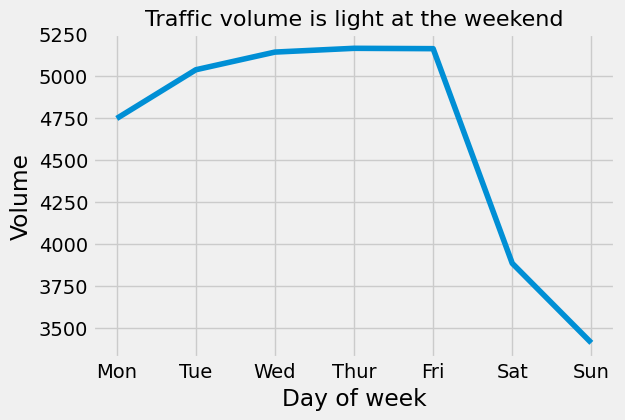

In [29]:
#Visualize data by day of week
volume_by_day_of_week.plot.line()
plt.title("Traffic volume is light at the weekend", fontsize=16)
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"])
plt.xlabel("Day of week")
plt.ylabel ("Volume")
plt.show()

Above graph clearly shows that volume is light at the weekend and heavy in the working days (Monday to Friday).
The light volume traffic of the weekend can drag down the average values, so we are going to look at the averages seperately by splitting dataset into 2 part: working days and weekend.

<b> <font size = "4"> 3. Volume traffic by hour </font> </b>

In [31]:
#Create new column "hour" by extracting hour from date_time column:
daytime["hour"]=daytime["date_time"].dt.hour
working_days=daytime[daytime["day_of_week"]<5]
weekend=daytime[daytime["day_of_week"]>=5]

<ipython-input-31-9ec27301af4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime["hour"]=daytime["date_time"].dt.hour


In [32]:
#Calculate traffic volume by hour in working days:
volume_by_hour_in_working_day=working_days.groupby(["hour"])["traffic_volume"].mean()
volume_by_hour_in_working_day

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64

In [33]:
#Calculate traffic volume by hour in weekend:
volume_by_hour_in_weekend=weekend.groupby(["hour"])["traffic_volume"].mean()
volume_by_hour_in_weekend

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64

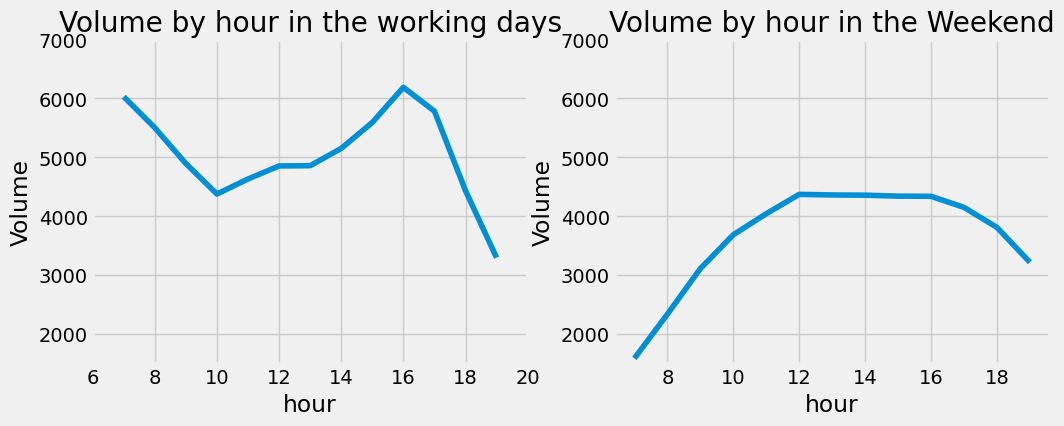

In [34]:
#Visualize the data

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
volume_by_hour_in_working_day.plot.line()
plt.ylim([1500,7000])
plt.xlim([6,20])
plt.title("Volume by hour in the working days")
plt.ylabel("Volume")

plt.subplot(1,2,2)
volume_by_hour_in_weekend.plot.line()
plt.ylim([1500,7000])
plt.title("Volume by hour in the Weekend")
plt.ylabel("Volume")
plt.show()

In general, the volume in the working days is higher than weekend.

In the working days: 
- The heavy traffic occurs around 7-8AM, this can be due to this time people start go to work
- The sencond time the traffic volume is high is around 4-5:30PM, this can be because people left office and go home

In the weekend:
- The volume is high at noon and after noon (10AM-6PM)
- The volume is really low in the morning


# Weather indicator

The next thing we can consider is weather. In the dataset there are 6 columns that we can find the answer:
- temp:Average temp in kelvin

- rain_1h: Amount in mm of rain that occurred in the hour

- snow_1h: Amount in mm of snow that occurred in the hour

- clouds_all: Percentage of cloud cover

- weather_main: Short textual description of the current weather

- weather_description: Longer textual description of the current weather

There are some columns are numeric type, so will find the correlation between them and traffic volume

In [20]:
daytime.corr()["traffic_volume"]

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
day_of_week      -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

There is no strong correlation between those data with traffic volume, the highest one is temperate. Let's check it if there is any pattern we can see.

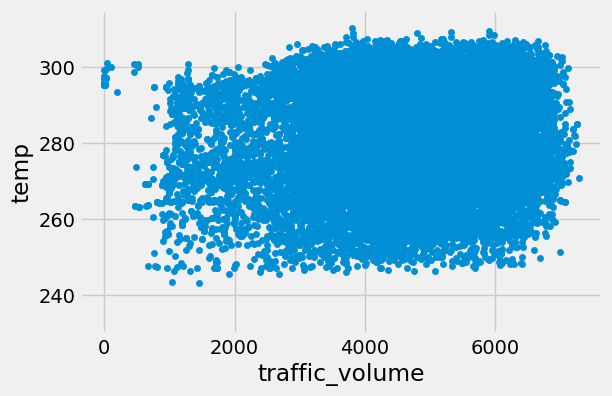

In [21]:
daytime.plot.scatter("traffic_volume", "temp")
plt.ylim([230,315])
plt.show()

There is no clear relation between traffic volume and temperature so temperature is not good indicator that impacts the heavy traffic, so let's check other object columns: 

- weather_main: Short textual description of the current weather

- weather_description: Longer textual description of the current weather

In [22]:
daytime["weather_main"].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

In [35]:
#Groupby data by weather type in weather_main column:
weather_type=daytime.groupby(["weather_main"])["traffic_volume"].mean()
weather_type

weather_main
Clear           4661.666879
Clouds          4746.375927
Drizzle         4712.699060
Fog             4298.933511
Haze            4545.434932
Mist            4530.901782
Rain            4686.953503
Smoke           4447.307692
Snow            4295.594612
Squall          4211.000000
Thunderstorm    4512.479042
Name: traffic_volume, dtype: float64

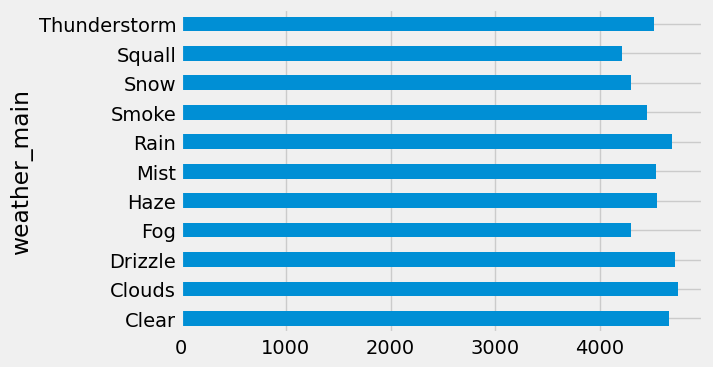

In [36]:
#Visualize data
weather_type.plot.barh()

There is no clear of weather type could a good indicator of heavy traffic. Let's check the column: weather_description

In [25]:
daytime["weather_description"].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'proximity shower rain',
       'moderate rain', 'drizzle', 'heavy intensity rain', 'fog',
       'proximity thunderstorm', 'heavy snow', 'snow', 'freezing rain',
       'shower snow', 'light rain and snow',
       'light intensity shower rain', 'thunderstorm with heavy rain',
       'thunderstorm with rain', 'thunderstorm with light rain',
       'proximity thunderstorm with rain', 'heavy intensity drizzle',
       'Sky is Clear', 'very heavy rain',
       'proximity thunderstorm with drizzle', 'light snow',
       'thunderstorm with drizzle', 'thunderstorm', 'smoke', 'SQUALLS',
       'light shower snow', 'sleet', 'thunderstorm with light drizzle',
       'shower drizzle'], dtype=object)

In [37]:
#Groupby data by weather type in weather_description column
weather=daytime.groupby(["weather_description"])["traffic_volume"].mean()
weather

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4802.848812
broken clouds                          4715.715045
drizzle                                4572.176849
few clouds                             4720.890763
fog                                    4298.933511
freezing rain                          4314.000000
haze                                   4545.434932
heavy intensity drizzle                4696.533333
heavy intensity rain                   4465.771429
heavy snow                             4300.826087
light intensity drizzle                4783.706362
light intensity shower rain            4437.454545
light rain                             4735.882162
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4347.850144
mist                                   4530.901782
moderate rain                          4639.564103
overcast cl

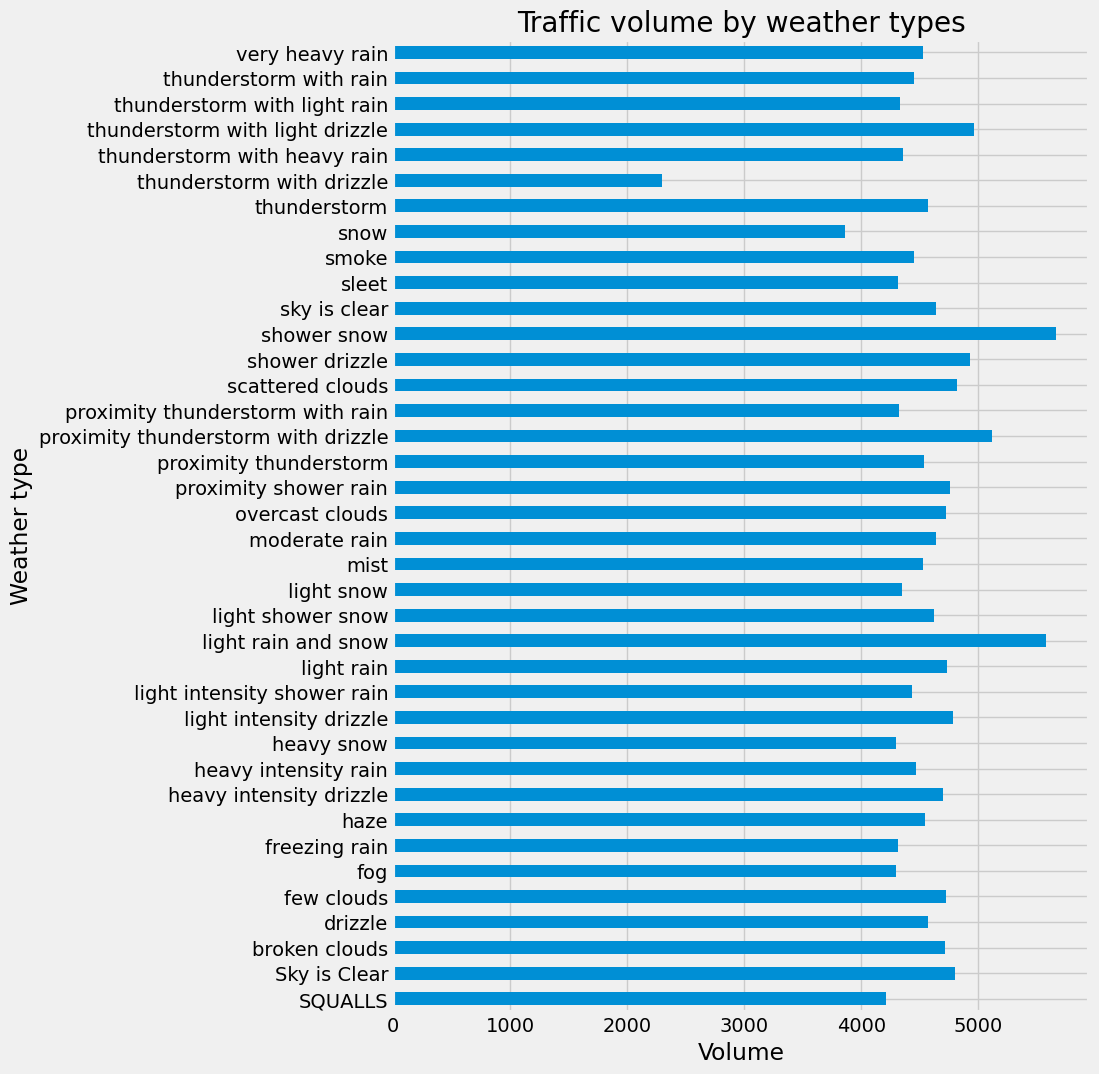

In [38]:
weather.plot.barh(figsize=(8,12))
plt.title("Traffic volume by weather types")
plt.xlabel("Volume")
plt.ylabel("Weather type")
plt.show()

In shower snow, light rain and snow and proximity thunderstorm with drizzle, the traffic volume is high.

# Conclusion:

From above analysis, we can conclude some good indicators for heavy traffic on I-94:

<b> <font size = "4"> Time indicators: </font> </b>

+ The traffic is usually heavier on March - October and lighter on November-February
+ The traffic is usally heavier on working days compared to the weekend
+ On the working days, the rush hour is around 7-8AM and 4-5PM


<b> <font size = "4"> Weather indicators: </font> </b>

+ Shower snow
+ Light rain and snow
+ Proximity thunderstorm with drizzle   
    